In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [2]:
# справочные значения высоты водного столба, м
X = np.array([0, 0.011, 0.022, 0.033, 0.044, 0.055, 0.066, 0.077, 0.088, 0.099, 0.110, 0.121, 0.132, 0.143, 0.154, 0.165, 0.176, 0.187, 0.198, 0.209, 0.220] )

In [3]:
# справочные значения стока воды через счетчик, соответствующие м3/ч
y = np.array([0, 1.447, 6.386, 15.105, 27.670, 44.057, 64.187, 87.941, 115.174, 145.715, 179.376, 215.950, 255.218, 296.945, 340.883, 386.774, 434.346, 483.315, 533.387, 584.255, 635.597])

In [ ]:
# строю линейную регрессию в scipy

In [4]:
res = scipy.stats.linregress(X,y)
res

LinregressResult(slope=2990.8476977567884, intercept=-97.863341991342, rvalue=0.9745634861706348, pvalue=8.429006442067679e-14, stderr=157.78717746691117, intercept_stderr=20.29063757198761)

In [ ]:
# построение модели в statsmodels.api

In [5]:
X_simple_constant = sm.add_constant(X)
model = sm.OLS(y, X_simple_constant)
res_simple = model.fit()
print(res_simple.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     359.3
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           8.43e-14
Time:                        21:00:10   Log-Likelihood:                -110.11
No. Observations:                  21   AIC:                             224.2
Df Residuals:                      19   BIC:                             226.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -97.8633     20.291     -4.823      0.0

In [ ]:
# R-squared(к-т детерминации), моя модель на 95% объясняет дисперсию в целевой переменной

In [ ]:
# строю график

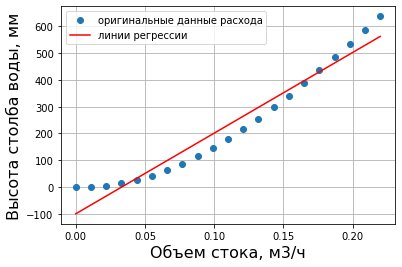

In [13]:
plt.plot(X, y, 'o', label='оригинальные данные расхода')
plt.plot(X, res.intercept + res.slope*X, 'r', label= 'линии регрессии')
plt.grid()
plt.xlabel('Объем стока, м3/ч', fontsize = 16)
plt.ylabel('Высота столба воды, мм', fontsize = 16)
plt.legend()
plt.show()

In [25]:
# импортирую LinearRegression
from sklearn.linear_model import LinearRegression
# модель для тернировки
lm=LinearRegression()
lm.fit(X.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

In [26]:
# импортирую библиотеки для полиномиального преобразования
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline


In [ ]:
# расчитываю ошибку для полиномов c различными степенями
from sklearn.metrics import mean_squared_error as mse

In [ ]:
all_error=[]

In [ ]:
degree=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [ ]:
for d in degree:
    Input=[('polinomial', PolynomialFeatures(degree=d)),('modal', LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(X.reshape(-1,1), y.reshape(-1,1))
    poly_pred=pipe.predict(X.reshape(-1,1))
    error = mse(y,poly_pred)
    all_error.append(error)

In [39]:
all_error

[2098.716692030509,
 33.4992304748659,
 0.5290395247605841,
 0.01600914548426699,
 0.0022555210605616125,
 0.00033047301556344763,
 6.289939676380045e-05,
 1.2456070775861878e-05,
 2.90375802884343e-06,
 5.602557416044479e-07,
 1.5889740433366794e-07,
 4.302459823381041e-08,
 2.8415523519188697e-08]

In [ ]:
# вывод: для подсчета объема стоков воды через контроллер беру оптимальный, с точки расчета - degree=3

In [68]:
# строю предиктивную модель с полиномом Degree=3
Input=[('polinomial', PolynomialFeatures(degree = 5)),('modal', LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X.reshape(-1,1), y.reshape(-1,1))

Pipeline(steps=[('polinomial', PolynomialFeatures(degree=5)),
                ('modal', LinearRegression())])

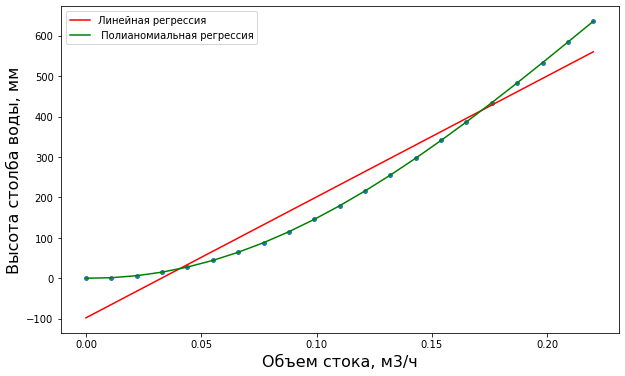

In [69]:
poly_pred=pipe.predict(X.reshape(-1,1))
y_pred=lm.predict(X.reshape(-1,1))
#сортировка прогнозируемых значений по отношению к предиктору
sorted_zip = sorted(zip(X, poly_pred))
X_poly, poly_pred = zip(*sorted_zip)
# прогнозируемый график
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=15)
plt.plot(X, y_pred, color='red', label = 'Линейная регрессия')
plt.plot(X_poly, poly_pred, color='green', label = ' Полианомиальная регрессия')
plt.xlabel('Объем стока, м3/ч', fontsize = 16)
plt.ylabel('Высота столба воды, мм', fontsize = 16)
plt.legend()
plt.show()


In [70]:
# вывожу коэффициенты для полинома с degree=4
pipe.named_steps['modal'].coef_



array([[ 0.00000000e+00, -5.34331678e+01,  1.50567789e+04,
         1.59116795e+04, -1.42026856e+05,  1.58815168e+05]])

In [65]:
h=0.022

In [66]:
# финальное уравнение, которое будет зашито в систему учета
V= 0--5.34331678e+01*h+1.50567789e+04*(h**2)--988.28360585*(h**3)-54678.513636*(h**4)


In [67]:
V

5.912182711624975